### SES, Holt & Holt-Winter Model

### Exponential Smoothing methods
#####  Exponential smoothing methods consist of flattening time series data. 
##### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.
##### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).
##### One or more parameters control how fast the weights decay.
##### These parameters have values between 0 and 1


### SES -  ETS(A, N, N) - Simple smoothing with additive errors


###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.

In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

### Example 1

The dataset, oil gives the annual production (millions of tonnes), Saudi Arabia, 1965- 2013.
* Forecast using SES model.
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

In [6]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   datetime                        import  datetime

def parser(x):
       return pd.datetime.strptime(x, '%Y')

series  =  pd.read_csv('oildata.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True, date_parser = parser)
print('Data range : ',  len(series))


Data range :  12


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [13]:
series.head(20)

Year
1996-01-01    445.364098
1997-01-01    453.195010
1998-01-01    454.409641
1999-01-01    422.378906
2000-01-01    456.037122
2001-01-01    440.386605
2002-01-01    425.194372
2003-01-01    486.205174
2004-01-01    500.429086
2005-01-01    521.275909
2006-01-01    508.947617
2007-01-01    488.888858
Name:  Quantity, dtype: float64

In [8]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [9]:
pred = ets.ExponentialSmoothing(series, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_pred = pred.forecast(steps = 3)
y_pred = pd.DataFrame(y_pred)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.7955
Initial Level 446.7953



C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,0
2008-01-01,493.281904
2009-01-01,493.281904
2010-01-01,493.281904


In [19]:
y_pred1    =  pred.predict(start = series.index[0])



In [20]:
y_pred1

1996-01-01    446.795349
1997-01-01    445.656734
1998-01-01    451.653720
1999-01-01    453.846160
2000-01-01    428.812760
2001-01-01    450.470777
2002-01-01    442.448434
2003-01-01    428.722171
2004-01-01    474.452090
2005-01-01    495.117780
2006-01-01    515.927569
2007-01-01    510.374751
Freq: AS-JAN, dtype: float64

In [11]:
rmse       =  np.sqrt(mean_squared_error(series, y_pred1))
mape       =  MAPE(series, y_pred1)

print('RMSE is %3.4f'  %rmse)
print('MAPE is %3.2f' %mape)


RMSE is 24.7839
MAPE is 4.21


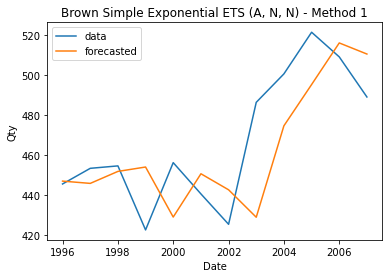

In [5]:
fig1, ax = plt.subplots()
ax.plot(series, label = 'data')
ax.plot(y_pred1, label = 'forecasted')
plt.legend(loc = 'upper left')
plt.title('Brown Simple Exponential ETS (A, N, N) - Method 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

### Train and Test data

###### We build the model using the training dataset.
###### We evalaute the model and predict using the test dataset.
###### We do this by selecting an arbitary split point in the ordered list of observations and creating training and test datasets. 

### Example 2

We have the petrol data from Jan 2001 to Sep 2013.
* Split the data into train and test in the ratio 70:30
* Use Single Exponential Smoothing method to forecast sales using the test data.
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

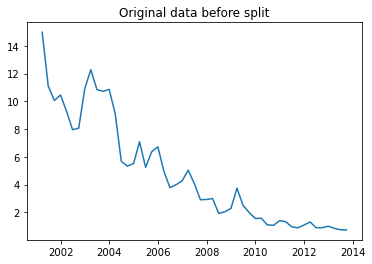


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter'] 


 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter'] 


 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter'] 


 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter'] 



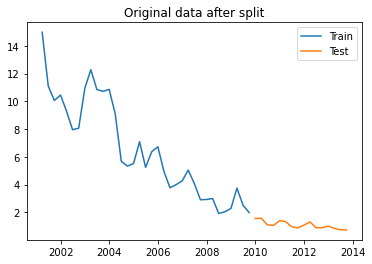

In [5]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing


#Defining the Mean Absolute Percentage Error Function
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('Petrol.csv')

#Defining the date range and specifying that it is a Quarterly Time Stamped date
date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

#Adding the Quarterly Time Stamped date to the index
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

#Plotting the time series
plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] #70% of the data for training the model
test              = Petrol[int(len(Petrol)*0.7):] #30% of the data for evaluating the model

#Printing the beginning and the ending of the training data
print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'],'\n')
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'],'\n')

#Printing the beginning and the ending of the test data
print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'],'\n')
print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'],'\n')

#Plotting the training and test data
plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

We will try with various values of $\alpha$ such as 0.1, 0.5 and 0.99 and then let the model optimize $\alpha$.

In [7]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Consumption']))

For alpha = 0.10,  RMSE is 3.0712 MAPE is 283.19


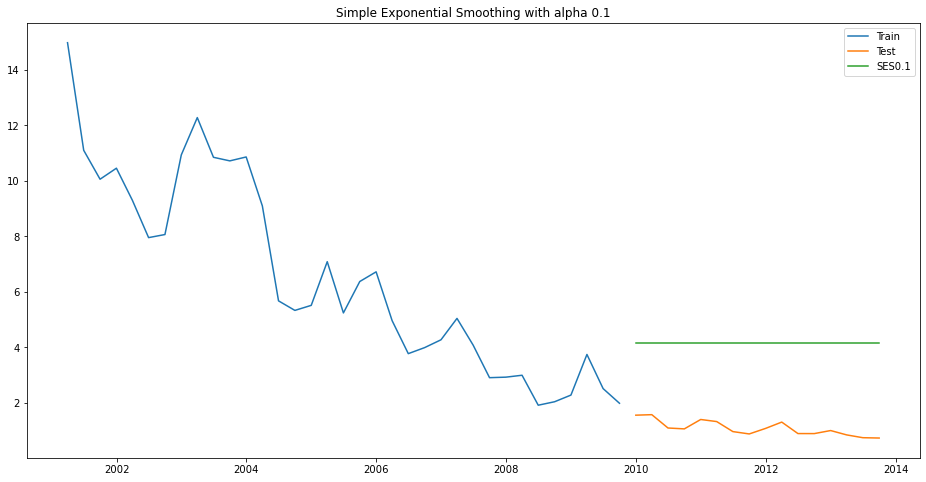

For alpha = 0.50,  RMSE is 1.3166 MAPE is 119.40


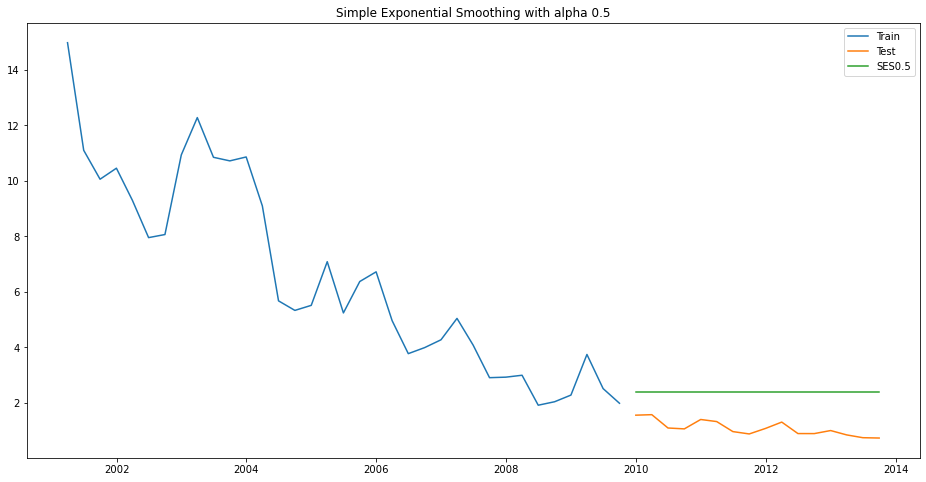

For alpha = 0.99,  RMSE is 0.9438 MAPE is 83.89


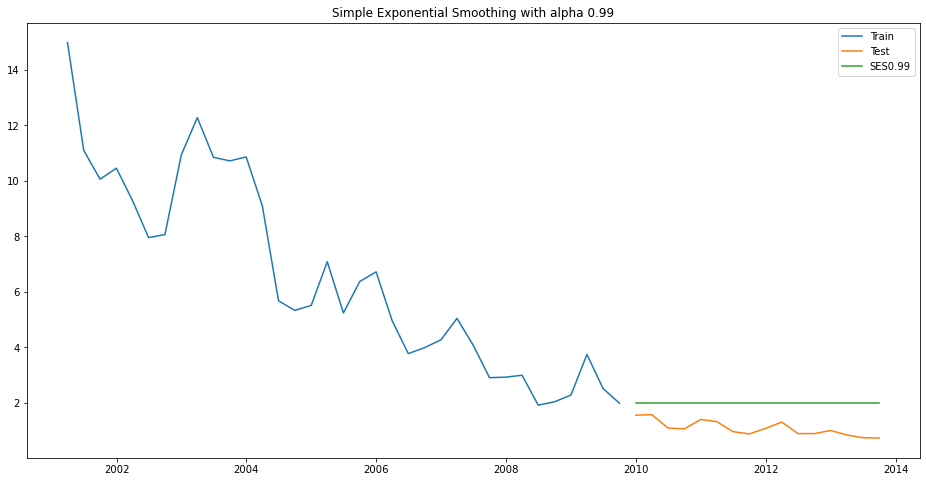

In [8]:
# fit model

#defining the various values of alpha for which we want to run the model
alpha_list = [0.1, 0.5, 0.99]

pred_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Consumption']))#calculating the forecasts for the test set 
    #time period
    rmse                 =  np.sqrt(mean_squared_error(test['Consumption'], pred_SES[alpha_str]))#calculate the RMSE
    #for the test set
    mape                 =  MAPE(test['Consumption'],pred_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    plt.figure(figsize=(16,8))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train.TimeIndex, train['Consumption'], label ='Train')
    plt.plot(test.TimeIndex, test['Consumption'], label  ='Test')
    plt.plot(test.TimeIndex, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

Let us get the optimum value for $\alpha$ by omitting the value and leave it for the model to decide.


== Simple Exponential Smoothing 


Smoothing Level 1.0
Initial Level 14.978

For alpha = 1.00,  RMSE is 0.9386 MAPE is 83.39


D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


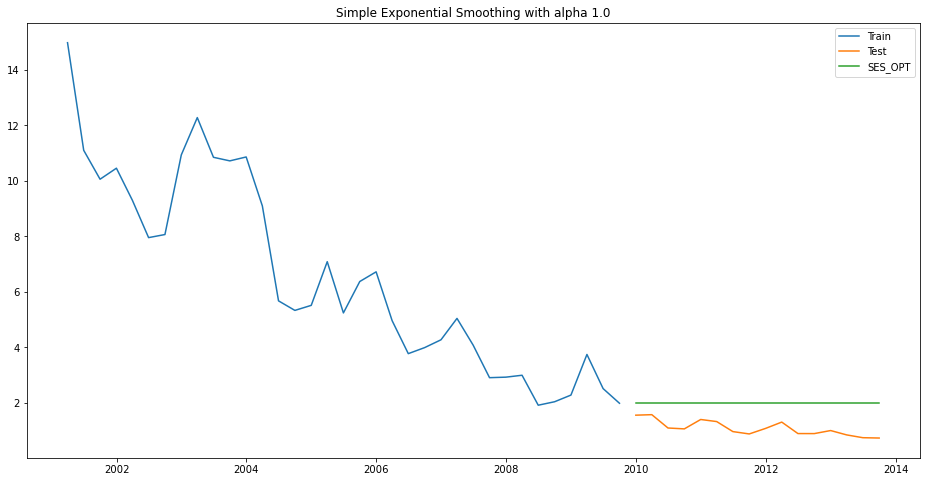

            35       36       37       38       39
Y_hat  1.98159  1.98159  1.98159  1.98159  1.98159
Y      1.55221  1.57034  1.08986  1.05821  1.39665


In [9]:
pred_opt   =  SimpleExpSmoothing(train['Consumption']).fit(optimized = True)
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(pred_opt.params['smoothing_level'], 4))
print('Initial Level',   np.round(pred_opt.params['initial_level'], 4))
print('')

y_pred_opt           = pred_opt.forecast(steps = 16)
df_pred_opt          = pd.DataFrame({'Y_hat':y_pred_opt,'Y':test['Consumption'].values})

rmse_opt             =  np.sqrt(mean_squared_error(test['Consumption'], y_pred_opt))
mape_opt             =  MAPE(test['Consumption'], y_pred_opt)

alpha_value          = np.round(pred_opt.params['smoothing_level'], 4)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

plt.figure(figsize=(16,8))
plt.plot(train.TimeIndex, train['Consumption'], label = 'Train')
plt.plot(test.TimeIndex, test['Consumption'],  label = 'Test')
plt.plot(test.TimeIndex, y_pred_opt,           label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

print(df_pred_opt.head().T)

### Inference

We observe that for the optimum $\alpha$ value, both RMSE and MAPE are smallest when compared to other $\alpha$ values of 0.1,0.5 and 0.99.

## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the single exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES and also known as Double Exponential model
* Applicable when data has Trend but no seasonality
* Two separate components are considered: Level and Trend
* Level is the local mean
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

### Example 3

* Use the data in example 2 and use Double Exponential Smoothing method to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

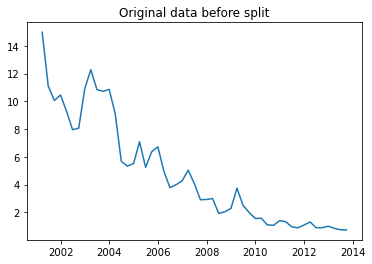


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter']

 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter']

 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter']

 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter']


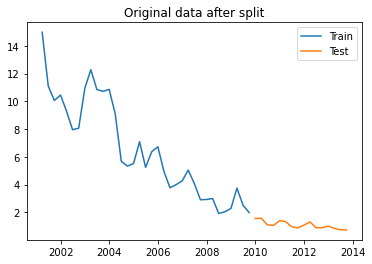

In [10]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('D:/Petrol.csv')

date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] 
test              = Petrol[int(len(Petrol)*0.7):]

print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'])

plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [11]:
model = Holt(np.asarray(train['Consumption']))

model_fit = model.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')



==Holt model Exponential Smoothing Parameters ==

Smoothing Level 1.0
Smoothing Slope 0.02
Initial Level 15.1271



D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [12]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Consumption']))

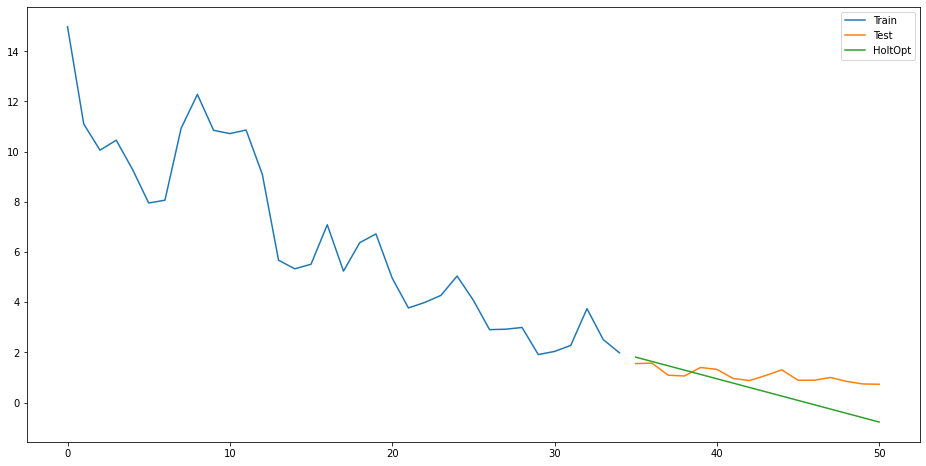

In [13]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [14]:
df_pred_opt          =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Consumption'].values})

rmse_opt             =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt             =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 1.00,  RMSE is 0.8283 MAPE is 63.01


#### Print the model parameters

In [15]:
print(model_fit.params)

{'smoothing_level': 1.0, 'smoothing_slope': 0.019968998115617153, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 15.127122181775311, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Inference

For the same pertol data, we have tried both SES and HOLT model.

| Model | RMSE | MAPE |
| ----- | ------ | ----- |
| SES |  0.9386  | 83.39 |
| Holt | 0.8283 | 63.01 |  

Note the decrease in both RMSE and MAPE for the HOLT model.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

### Multi-Steps Forecast

### Example 4

* Use the data in example 2.
* Build the Holt Winter's linear method with additive errors model to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.

DatetimeIndex(['2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')
                               0      

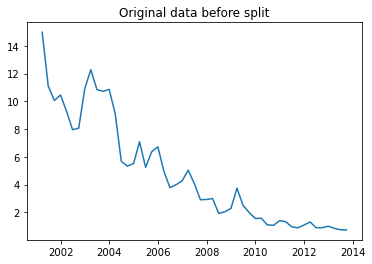


 Training data start at 

   Year Quarter  Consumption  TimeIndex
0  2001      Q1       14.978 2001-03-31 ['Year', 'Quarter']

 Training data ends at 

    Year Quarter  Consumption  TimeIndex
34  2009      Q3      1.98159 2009-09-30 ['Year', 'Quarter']

 Test data start at 

    Year Quarter  Consumption  TimeIndex
35  2009      Q4      1.55221 2009-12-31 ['Year', 'Quarter']

 Test data ends at 

    Year Quarter  Consumption  TimeIndex
50  2013      Q3      0.72823 2013-09-30 ['Year', 'Quarter']


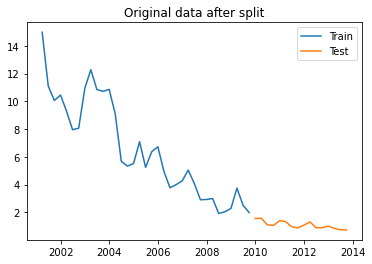

In [16]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

Petrol              =  pd.read_csv('D:/Petrol.csv')

date_rng            =  pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
print(date_rng)

Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
print(Petrol.head(3).T)

plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.title('Original data before split')
plt.show()

#Creating train and test set 

train             = Petrol[0:int(len(Petrol)*0.7)] 
test              = Petrol[int(len(Petrol)*0.7):]

print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Quarter'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Quarter'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Quarter'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Quarter'])

plt.plot(train.TimeIndex, train.Consumption, label = 'Train')
plt.plot(test.TimeIndex, test.Consumption,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [17]:
pred1 = ExponentialSmoothing(np.asarray(train['Consumption']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 16)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Consumption']})
print(df_pred1)


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.6842
Smoothing Slope:  0.0526
Smoothing Seasonal:  0.3158
Initial Level:  9.7042
Initial Slope:  0.01
Initial Seasons:  [ 5.2738  1.3948  0.3528  0.7498 -0.4092 -1.7522 -1.6412  1.2288  2.5738
  1.1428  1.0138  1.1548]

       Y_hat        Y
35  2.154588  1.55221
36  3.684941  1.57034
37  1.841486  1.08986
38  0.696473  1.05821
39  0.750882  1.39665
40  0.450783  1.32161
41 -1.612343  0.96034
42 -1.816603  0.87553
43 -0.761210  1.07530
44  0.404251  1.30285
45 -0.568414  0.88939
46 -0.441742  0.88818
47 -0.483409  0.99804
48  1.046944  0.84120
49 -0.796511  0.74032
50 -1.941524  0.72823


D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


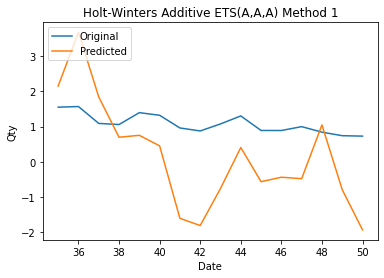

In [18]:
### Plot

fig2, ax = plt.subplots()
ax.plot(df_pred1.Y, label='Original')
ax.plot(df_pred1.Y_hat, label='Predicted')

plt.legend(loc='upper left')
plt.title('Holt-Winters Additive ETS(A,A,A) Method 1')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [19]:
rmse    =  np.sqrt(mean_squared_error(df_pred1.Y, df_pred1.Y_hat))
mape    =  MAPE(df_pred1.Y, df_pred1.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))

For alpha = 0.68,  RMSE is 1.5885 MAPE is 127.42


In [20]:
print(pred1.params)

{'smoothing_level': 0.6842105263157894, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.3157894736842105, 'damping_slope': nan, 'initial_level': 9.704173333333333, 'initial_slope': 0.01, 'initial_seasons': array([ 5.27382667,  1.39482667,  0.35282667,  0.74982667, -0.40917333,
       -1.75217333, -1.64117333,  1.22882667,  2.57382667,  1.14282667,
        1.01382667,  1.15482667]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


We observe that MAPE for Holt-Winters Additive ETS(A,A,A) Method is 128.21 and it is very much higher than (63.01) ETS(A, A, N) - Holt's Model.

We will try with  Air Passengers data.

In [47]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

#Read the airpassengers data
AirPax              =  pd.read_csv('D:/AirPassenger.csv')
date_rng            = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

#Creating train and test set 

train             = AirPax[0:int(len(AirPax)*0.7)] 
test              = AirPax[int(len(AirPax)*0.7):]

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
  Year-Month  Pax  TimeIndex
0   1949-Jan  112 1949-01-31
1   1949-Feb  118 1949-02-28
2   1949-Mar  132 1949-03-31
3   1949-Apr  129 1949-04-30
4   1949-May  121 1949-05-31



 Training data start at 

  Year-Month  Pax  TimeIndex
0   1949-Jan  112 1949-01-31 ['Year', 'Month']

 Training data ends at 

   Year-Month  Pax  TimeIndex
99   1957-Apr  348 1957-04-30 ['Year', 'Month']

 Test data start at 

    Year-Month  Pax  TimeIndex
100   1957-May  355 1957-05-31 ['Year', 'Month']

 Test data ends at 

    Year-Month  Pax  TimeIndex
143   1960-Dec  432 1960-12-31 ['Year', 'Month']


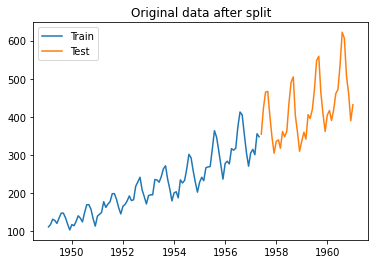

In [48]:
print("\n Training data start at \n")
print (train[train.TimeIndex == train.TimeIndex.min()],['Year','Month'])
print("\n Training data ends at \n")
print (train[train.TimeIndex == train.TimeIndex.max()],['Year','Month'])

print("\n Test data start at \n")
print (test[test.TimeIndex == test.TimeIndex.min()],['Year','Month'])

print("\n Test data ends at \n")
print (test[test.TimeIndex == test.TimeIndex.max()],['Year','Month'])

plt.plot(train.TimeIndex, train.Pax, label = 'Train')
plt.plot(test.TimeIndex, test.Pax,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

In [49]:
pred = ExponentialSmoothing(np.asarray(train['Pax']),
                                  seasonal_periods=12 ,seasonal='add').fit(optimized=True)

print(pred.params)

print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred.params['initial_seasons'], 4))
print('')


{'smoothing_level': 0.368421050256224, 'smoothing_slope': nan, 'smoothing_seasonal': 0.6315789449930661, 'damping_slope': nan, 'initial_level': 189.65926188039074, 'initial_slope': nan, 'initial_seasons': array([ -81.22635246,  -74.21898747,  -60.99018259,  -66.80238855,
        -75.91697334,  -62.63289683,  -51.06464155,  -54.36002685,
        -69.00621342,  -87.69233032, -101.13889599,  -82.17539158]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.3684
Smoothing Slope:  nan
Smoothing Seasonal:  0.6316
Initial Level:  189.6593
Initial Slope:  nan
Initial Seasons:  [ -81.2264  -74.219   -60.9902  -66.8024  -75.917   -62.6329  -51.0646
  -54.36    -69.0062  -87.6923 -101.1389  -82.1754]



D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


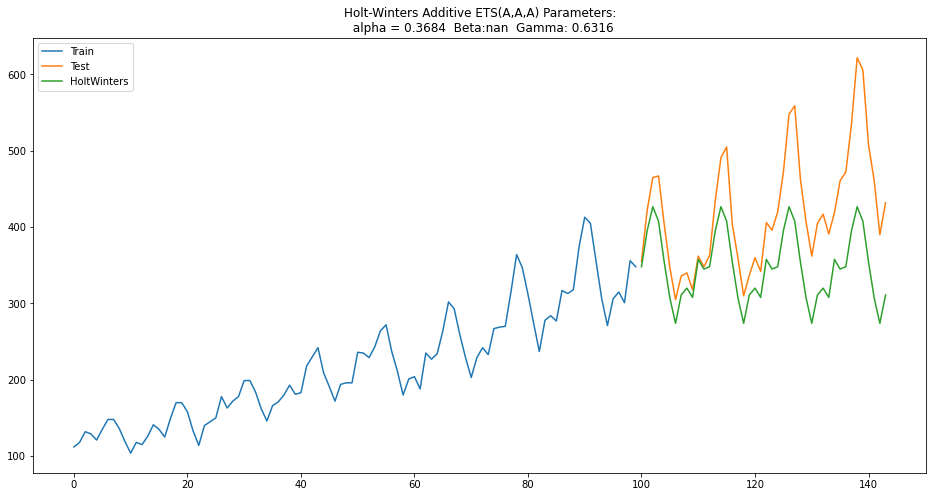

In [50]:
pred_HoltW = test.copy()
pred_HoltW['HoltW'] = pred.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(pred_HoltW['HoltW'], label='HoltWinters')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_slope'], 4)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 4)))
plt.legend(loc='best')
plt.show()

In [51]:
df_pred_opt =  pd.DataFrame({'Y_hat':pred_HoltW['HoltW'] ,'Y':test['Pax'].values})

rmse_opt    =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt    =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.37,  RMSE is 89.1980 MAPE is 17.47



### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

### Multi-Steps Forecast

### Example 4

Use Air Passengers data and fit ETS(A, A, M)  model to predict the last 12 months.
* Build the Holt Winter's lETS(A, A, M) model to forecast sales for the test data
* Calculate the values of RMSE and MAPE.
* Plot the forecasted values along with original values.


In [26]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

AirPax              =  pd.read_csv('D:/AirPassenger.csv')
date_rng            = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
print(date_rng)

AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
print(AirPax.head())

#Creating train and test set 

train             = AirPax[0:int(len(AirPax)*0.7)] 
test              = AirPax[int(len(AirPax)*0.7):]

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')
  Year-Month  Pax  TimeIndex
0   1949-Jan  112 1949-01-31
1   1949-Feb  118 1949-02-28
2   1949-Mar  132 1949-03-31
3   1949-Apr  129 1949-04-30
4   1949-May  121 1949-05-31


ETS(A, A, M) model

In [27]:
pred = ExponentialSmoothing(np.asarray(train['Pax']),
                                  seasonal_periods=12 ,seasonal='multiplicative').fit(optimized=True)

print(pred.params)

print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred.params['initial_seasons'], 4))
print('')

{'smoothing_level': 0.7894736842105263, 'smoothing_slope': nan, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 198.22222905046635, 'initial_slope': nan, 'initial_seasons': array([0.5560357 , 0.56219354, 0.66415201, 0.65258204, 0.64860015,
       0.71690669, 0.76929251, 0.7466192 , 0.66682675, 0.58730703,
       0.50851541, 0.58023315]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.7895
Smoothing Slope:  nan
Smoothing Seasonal:  0.2105
Initial Level:  198.2222
Initial Slope:  nan
Initial Seasons:  [0.556  0.5622 0.6642 0.6526 0.6486 0.7169 0.7693 0.7466 0.6668 0.5873
 0.5085 0.5802]



D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
D:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


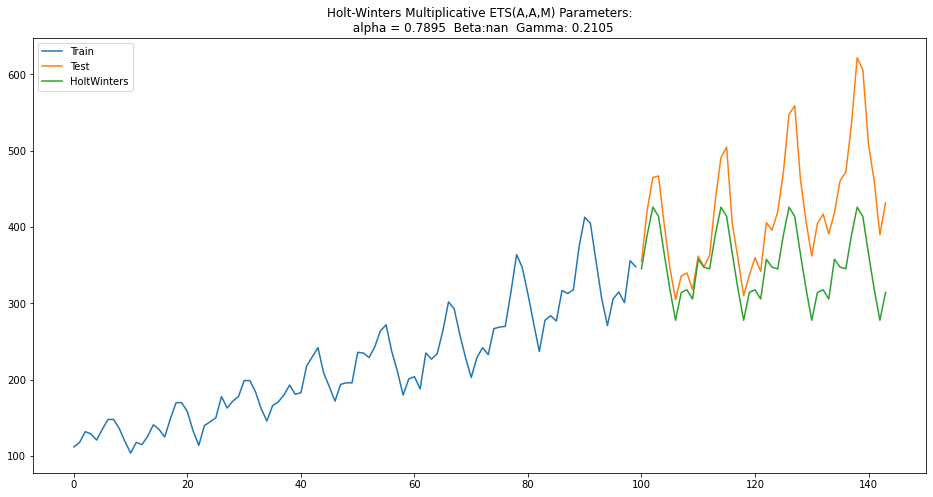

In [28]:
pred_HoltW = test.copy()

pred_HoltW['HoltWM'] = pred.forecast(len(test['Pax']))
plt.figure(figsize=(16,8))
plt.plot(train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(pred_HoltW['HoltWM'], label='HoltWinters')
plt.title('Holt-Winters Multiplicative ETS(A,A,M) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_slope'], 4)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 4)))
plt.legend(loc='best')
plt.show()

### Report model accuracy

In [29]:
df_pred_opt =  pd.DataFrame({'Y_hat':pred_HoltW['HoltWM'] ,'Y':test['Pax'].values})

rmse_opt    =  np.sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
mape_opt    =  MAPE(df_pred_opt.Y, df_pred_opt.Y_hat)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.79,  RMSE is 86.7234 MAPE is 16.92


#### Inference

**MAPE of ETS(A,A,M) model is 16.92 and it is lesser than 17.47, MAPE of  ETS(A,A,A) model, **

Hence, prediction of Holt-Winter - Additive Trend and Multiplicative Seasonality model is better than Holt-Winter - Additive model 

# END